In [23]:
%matplotlib inline
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [55]:
# Number of outliers to use.
n_outliers = 3

In [78]:
# Main helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot(X, y):
    plt.scatter(X[n_outliers:], y[n_outliers:])
    plt.scatter(X[:n_outliers], y[:n_outliers])
    
def plot_fit(model):
    q = np.linspace(-5, 5)
    plt.plot(q, model.coef_[0]* sigmoid(q) + model.intercept_)

In [68]:
# Make random sigmoidal data, with outliers
X = np.random.random(size=[11, 1]) * 10 - 5
y = sigmoid(X)
for i in range(n_outliers):
    y[i] = np.random.random()  

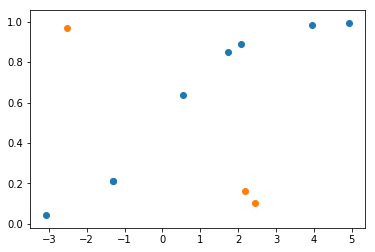

In [69]:
# Plot the data and outliers.
plot(X, y)

In [70]:
# Fit a standard least squares model with sigmoidal-basis
lr = linear_model.LinearRegression()
lr.fit(sigmoid(X), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

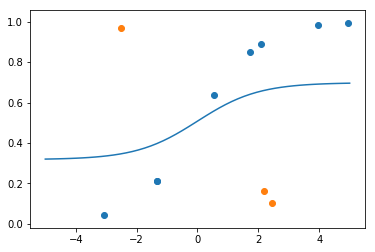

In [73]:
# Show that outliers are bad.
plot(X, y)
plot_fit(lr)

In [75]:
# Robustly fit linear model with RANSAC algorithm 
# (https://en.wikipedia.org/wiki/Random_sample_consensus)
ransac = linear_model.RANSACRegressor()
_ = ransac.fit(sigmoid(X), y)

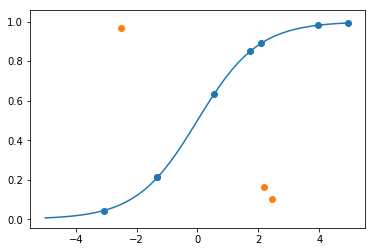

In [80]:
# Graph is pretty now!
kept = ransac.inlier_mask_
plt.scatter(X[kept]b, y[kept])
plt.scatter(X[np.logical_not(kept)], y[np.logical_not(kept)])
plot_fit(ransac.estimator_)

In [83]:
from IPython.display import HTML
HTML('<img src="https://media.giphy.com/media/ktcUyw6mBlMVa/giphy.gif">')